In [2]:
import numpy as np
from acrobotics.geometry import Shape

# Geometry, shapes and collision checking

## Shapes

Shapes are geometric objects to represent robots or other things in the planning environment.
You can use them for:

visualization
    A shape has a **plot** function to display them as a wireframe in matplotlib axes.
collision checking
    A shape has a **is_in_collision** function to check if they collide with other shapes.
representation
    One can get different aspects of a shape such as the vertices or edges.
    These are used for plotting but are also useful for optimization algorithms for example.

In the current version only boxes are implemented.

## Shape position and orientation

The pose of a shape is represented with a homogeneous transform matrix.
You handle this by setting the transform to the desired value before asking anything of a shape.
For example, if I want all the edges of a box of 1x2x2, I do:

In [3]:
box = Shape(1, 2, 2)
print(box.get_vertices())

[[-0.5  1.   1. ]
 [-0.5  1.  -1. ]
 [-0.5 -1.   1. ]
 [-0.5 -1.  -1. ]
 [ 0.5  1.   1. ]
 [ 0.5  1.  -1. ]
 [ 0.5 -1.   1. ]
 [ 0.5 -1.  -1. ]]


If I want the edges of the same box in a different position I first have to set its transform.
The tranform is specified as a 4 by 4 numpy array.

In [4]:
tf = np.eye(4)
tf[2, 3] = 0.6
box.set_transform(tf)

print(box.get_vertices())

[[-0.5  1.   1.6]
 [-0.5  1.  -0.4]
 [-0.5 -1.   1.6]
 [-0.5 -1.  -0.4]
 [ 0.5  1.   1.6]
 [ 0.5  1.  -0.4]
 [ 0.5 -1.   1.6]
 [ 0.5 -1.  -0.4]]


See, the box moved! All other task handle shapes with this basic API.

We can have a look at the shape. The module `acrobotics.util` has a convenience fucntion to get 3d compatible matplotlib axes. **Notice** that we have to specify where to plot the box, a shape has no inherent position.

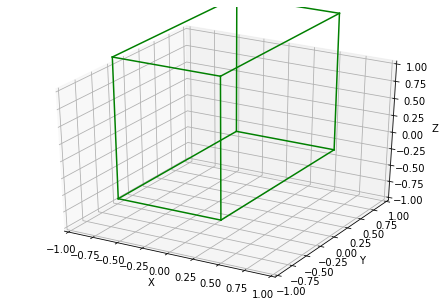

In [8]:
import matplotlib.pyplot as plt
from acrobotics.util import get_default_axes3d
fig, ax = get_default_axes3d()
box.plot(ax, tf, c='green')
plt.show()